# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

#### AMT_INCOME_TOTAL
以log分離資料

In [5]:
app_train['equal_freq_AMT_INCOME_TOTAL'] = pd.qcut(app_train['AMT_INCOME_TOTAL'], 4)

In [6]:
app_train['equal_freq_AMT_INCOME_TOTAL'].value_counts()

(25649.999, 112500.0]      100578
(147150.0, 202500.0]        82213
(202500.0, 117000000.0]     71538
(112500.0, 147150.0]        53182
Name: equal_freq_AMT_INCOME_TOTAL, dtype: int64

In [7]:
app_train['log_AMT_INCOME_TOTAL'] = np.log(app_train['AMT_INCOME_TOTAL'])

In [8]:
app_train['equal_freq_log_AMT_INCOME_TOTAL'] = pd.qcut(app_train['log_AMT_INCOME_TOTAL'], 10)

In [9]:
app_train['equal_freq_log_AMT_INCOME_TOTAL'].value_counts()

(11.631, 11.813]    48849
(12.101, 12.324]    44809
(11.503, 11.631]    36907
(10.151, 11.302]    33391
(11.899, 11.995]    31120
(11.995, 12.101]    30704
(11.302, 11.503]    30280
(12.506, 18.578]    27161
(12.324, 12.506]    19957
(11.813, 11.899]     4333
Name: equal_freq_log_AMT_INCOME_TOTAL, dtype: int64

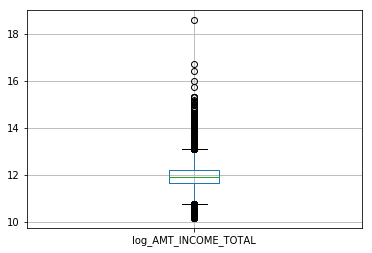

In [10]:
app_train.boxplot(column=['log_AMT_INCOME_TOTAL'])

In [11]:
pd.interval_range(start=10, end=19)

IntervalIndex([(10, 11], (11, 12], (12, 13], (13, 14], (14, 15], (15, 16], (16, 17], (17, 18], (18, 19]]
              closed='right',
              dtype='interval[int64]')

In [12]:
pd.cut(app_train['log_AMT_INCOME_TOTAL'], bins=pd.interval_range(start=10, end=19)).value_counts()

(11, 12]    176332
(12, 13]    117007
(10, 11]      8552
(13, 14]      5462
(14, 15]       143
(15, 16]        11
(16, 17]         3
(18, 19]         1
(17, 18]         0
Name: log_AMT_INCOME_TOTAL, dtype: int64

In [13]:
# 去除過大資料
sub_app_train = app_train[app_train['log_AMT_INCOME_TOTAL'] < 15].copy()

In [14]:
sub_app_train['binned_log_AMT_INCOME_TOTAL'] = pd.cut(sub_app_train['log_AMT_INCOME_TOTAL'], bins=pd.interval_range(start=10, end=15))

In [15]:
# 顯示不同組的數量
print(sub_app_train['binned_log_AMT_INCOME_TOTAL'].value_counts())
sub_app_train.head()

(11, 12]    176332
(12, 13]    117007
(10, 11]      8552
(13, 14]      5462
(14, 15]       143
Name: binned_log_AMT_INCOME_TOTAL, dtype: int64


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,equal_freq_AMT_INCOME_TOTAL,log_AMT_INCOME_TOTAL,equal_freq_log_AMT_INCOME_TOTAL,binned_log_AMT_INCOME_TOTAL
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,1.0,False,"(147150.0, 202500.0]",12.218495,"(12.101, 12.324]","(12, 13]"
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,False,"(202500.0, 117000000.0]",12.506177,"(12.324, 12.506]","(12, 13]"
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,False,"(25649.999, 112500.0]",11.119883,"(10.151, 11.302]","(11, 12]"
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,False,"(112500.0, 147150.0]",11.813030,"(11.631, 11.813]","(11, 12]"
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,False,"(112500.0, 147150.0]",11.707670,"(11.631, 11.813]","(11, 12]"


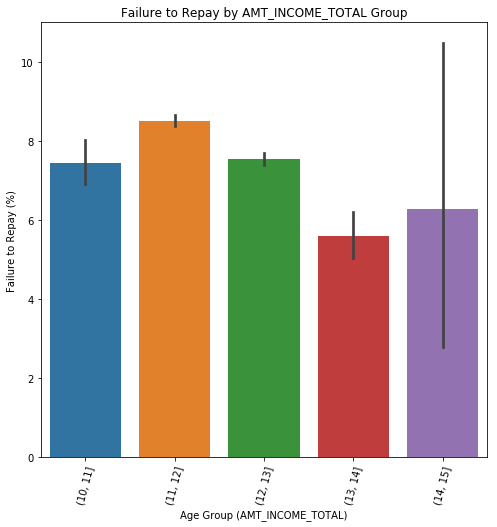

In [17]:
plt.figure(figsize = (8, 8))

px = sub_app_train['binned_log_AMT_INCOME_TOTAL']
py = 100 * sub_app_train['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (AMT_INCOME_TOTAL)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by AMT_INCOME_TOTAL Group');